In [1]:
print("Name: Pooja Rawool")
print("PRN: 1132200081")

Name: Pooja Rawool
PRN: 1132200081


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
%cd D:\MSC\Trimester2\LabonML\Datasets

D:\MSC\Trimester2\LabonML\Datasets


In [4]:
#Binomial Logistic Regression
dataset = pd.read_csv('training.csv')
ds_test=pd.read_csv('testing.csv')

In [5]:
dataset.shape

(4339, 6)

In [6]:
dataset.head()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,w,120.362774,205.500000,119.395349,416.581395,20.676318
1,w,124.739583,202.800000,115.333333,354.333333,16.707151
2,w,134.691964,199.285714,116.857143,477.857143,22.496712
3,w,127.946309,178.368421,92.368421,278.473684,14.977453
4,w,135.431548,197.000000,112.690476,532.952381,17.604193


In [7]:
dataset.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,126.831298,233.906908,117.292439,534.104683,24.924588
std,13.735836,60.757687,60.711159,154.495500,11.008303
min,0.000000,164.625000,59.142857,86.500000,0.000000
25%,118.589080,206.000000,91.975244,422.875000,18.009143
50%,127.479167,221.454545,101.727273,528.500000,23.612444
75%,135.043591,241.791304,116.866071,643.087037,29.899148
max,183.281250,955.714286,746.333333,1005.516129,156.508431


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4339 non-null   object 
 1   GLCM_pan    4339 non-null   float64
 2   Mean_Green  4339 non-null   float64
 3   Mean_Red    4339 non-null   float64
 4   Mean_NIR    4339 non-null   float64
 5   SD_pan      4339 non-null   float64
dtypes: float64(5), object(1)
memory usage: 203.5+ KB


In [9]:
y_train=dataset["class"]
dataset=dataset.drop("class",axis=1)
y_test=ds_test["class"]
ds_test=ds_test.drop("class",axis=1)

In [10]:
dataset.shape,y_train.shape

((4339, 5), (4339,))

In [11]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

array([[<AxesSubplot:title={'center':'GLCM_pan'}>,
        <AxesSubplot:title={'center':'Mean_Green'}>],
       [<AxesSubplot:title={'center':'Mean_Red'}>,
        <AxesSubplot:title={'center':'Mean_NIR'}>],
       [<AxesSubplot:title={'center':'SD_pan'}>, <AxesSubplot:>]],
      dtype=object)

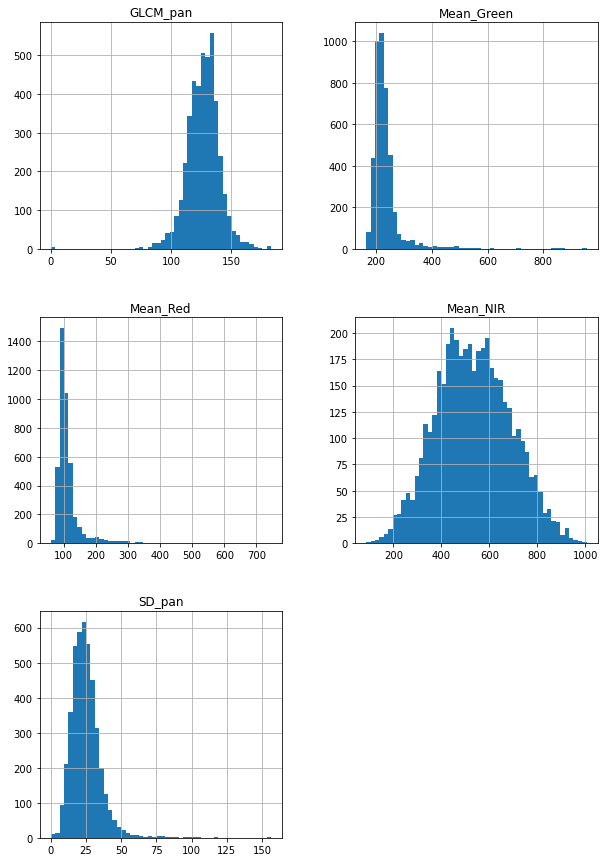

In [12]:
dataset.hist(bins=50,figsize=(10,15))

In [13]:
dataset_corr_matrix=dataset.corr()

In [14]:
dataset_corr_matrix

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
GLCM_pan,1.000000,-0.122384,-0.107166,-0.094263,-0.065023
Mean_Green,-0.122384,1.000000,0.964682,0.223518,0.246103
Mean_Red,-0.107166,0.964682,1.000000,0.121230,0.254383
Mean_NIR,-0.094263,0.223518,0.121230,1.000000,0.120276
SD_pan,-0.065023,0.246103,0.254383,0.120276,1.000000


array([[<AxesSubplot:xlabel='GLCM_pan', ylabel='GLCM_pan'>,
        <AxesSubplot:xlabel='Mean_Green', ylabel='GLCM_pan'>,
        <AxesSubplot:xlabel='Mean_Red', ylabel='GLCM_pan'>,
        <AxesSubplot:xlabel='Mean_NIR', ylabel='GLCM_pan'>,
        <AxesSubplot:xlabel='SD_pan', ylabel='GLCM_pan'>],
       [<AxesSubplot:xlabel='GLCM_pan', ylabel='Mean_Green'>,
        <AxesSubplot:xlabel='Mean_Green', ylabel='Mean_Green'>,
        <AxesSubplot:xlabel='Mean_Red', ylabel='Mean_Green'>,
        <AxesSubplot:xlabel='Mean_NIR', ylabel='Mean_Green'>,
        <AxesSubplot:xlabel='SD_pan', ylabel='Mean_Green'>],
       [<AxesSubplot:xlabel='GLCM_pan', ylabel='Mean_Red'>,
        <AxesSubplot:xlabel='Mean_Green', ylabel='Mean_Red'>,
        <AxesSubplot:xlabel='Mean_Red', ylabel='Mean_Red'>,
        <AxesSubplot:xlabel='Mean_NIR', ylabel='Mean_Red'>,
        <AxesSubplot:xlabel='SD_pan', ylabel='Mean_Red'>],
       [<AxesSubplot:xlabel='GLCM_pan', ylabel='Mean_NIR'>,
        <AxesSubplot:xlabel

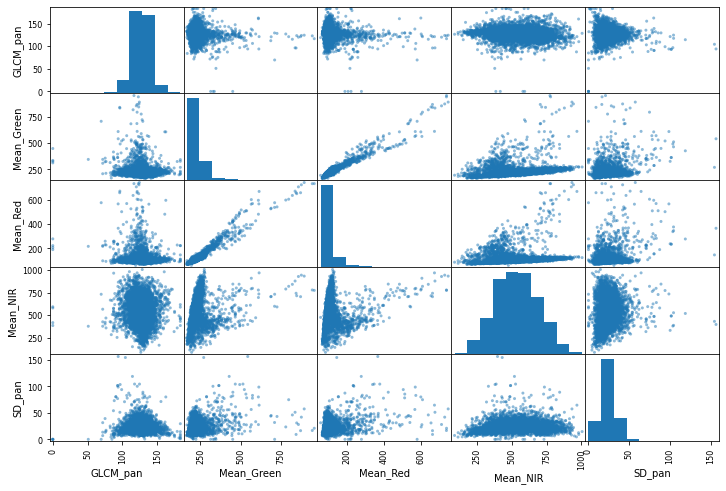

In [15]:
from pandas.plotting import scatter_matrix
attributes = ['GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR', 'SD_pan']
scatter_matrix(dataset[attributes], figsize=(12, 8))

In [16]:
clf = LogisticRegression(random_state=0).fit(dataset, y_train)

In [17]:
clf

LogisticRegression(random_state=0)

In [18]:
y_pred = clf.predict(ds_test)

In [19]:
clf.score(ds_test, y_test)

0.714

In [20]:
#Multinomial Logistic Regression
dataset = pd.read_csv('abalone.data',names=['sex','length','diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings'])

In [21]:
dataset.shape

(4177, 9)

In [22]:
dataset.head()

,sex,length,diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
dataset.describe()

,length,diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


array([[<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole_weight'}>,
        <AxesSubplot:title={'center':'Shucked_weight'}>,
        <AxesSubplot:title={'center':'Viscera_weight'}>],
       [<AxesSubplot:title={'center':'Shell_weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

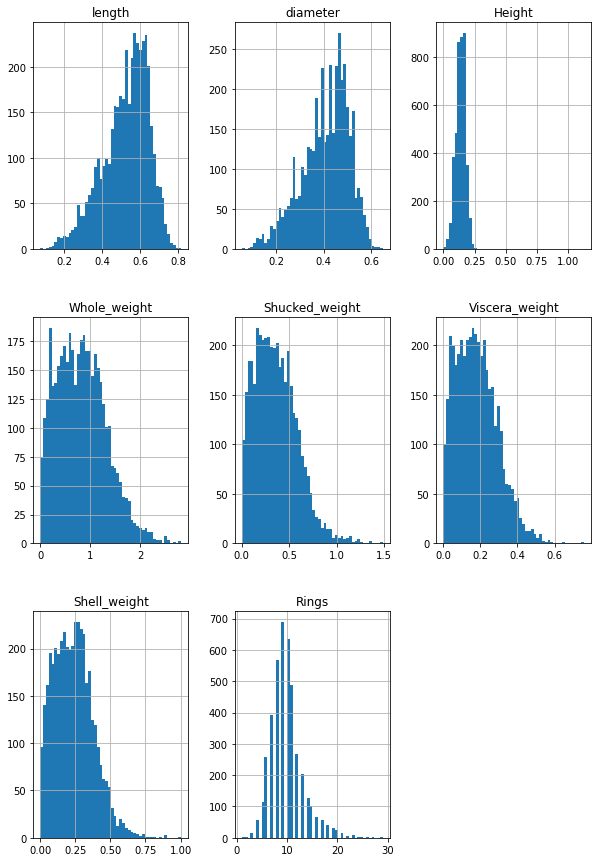

In [25]:
dataset.hist(bins=50,figsize=(10,15))

In [26]:
dataset_corr_matrix=dataset.corr()

In [27]:
dataset_corr_matrix

,length,diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [28]:
ds_train,ds_test=train_test_split(dataset,test_size=0.20,random_state=0)

In [29]:
ds_train.shape,ds_test.shape

((3341, 9), (836, 9))

In [30]:
ds_corr_matrix=ds_train.corr()
ds_corr_matrix

,length,diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
length,1.000000,0.986626,0.809545,0.925283,0.898074,0.901923,0.896668,0.551926
diameter,0.986626,1.000000,0.815144,0.924761,0.892732,0.898102,0.903953,0.569614
Height,0.809545,0.815144,1.000000,0.802585,0.761996,0.780910,0.799362,0.533590
Whole_weight,0.925283,0.924761,0.802585,1.000000,0.969501,0.965920,0.953238,0.535350
Shucked_weight,0.898074,0.892732,0.761996,0.969501,1.000000,0.932480,0.879739,0.414353
Viscera_weight,0.901923,0.898102,0.780910,0.965920,0.932480,1.000000,0.904726,0.496502
Shell_weight,0.896668,0.903953,0.799362,0.953238,0.879739,0.904726,1.000000,0.625154
Rings,0.551926,0.569614,0.533590,0.535350,0.414353,0.496502,0.625154,1.000000


In [31]:
ds_corr_matrix["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell_weight      0.625154
diameter          0.569614
length            0.551926
Whole_weight      0.535350
Height            0.533590
Viscera_weight    0.496502
Shucked_weight    0.414353
Name: Rings, dtype: float64

array([[<AxesSubplot:xlabel='length', ylabel='length'>,
        <AxesSubplot:xlabel='diameter', ylabel='length'>,
        <AxesSubplot:xlabel='Height', ylabel='length'>,
        <AxesSubplot:xlabel='Whole_weight', ylabel='length'>,
        <AxesSubplot:xlabel='Shucked_weight', ylabel='length'>,
        <AxesSubplot:xlabel='Viscera_weight', ylabel='length'>,
        <AxesSubplot:xlabel='Shell_weight', ylabel='length'>,
        <AxesSubplot:xlabel='Rings', ylabel='length'>],
       [<AxesSubplot:xlabel='length', ylabel='diameter'>,
        <AxesSubplot:xlabel='diameter', ylabel='diameter'>,
        <AxesSubplot:xlabel='Height', ylabel='diameter'>,
        <AxesSubplot:xlabel='Whole_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='Shucked_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='Viscera_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='Shell_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='Rings', ylabel='diameter'>],
       [<AxesSubplot:xlabel=

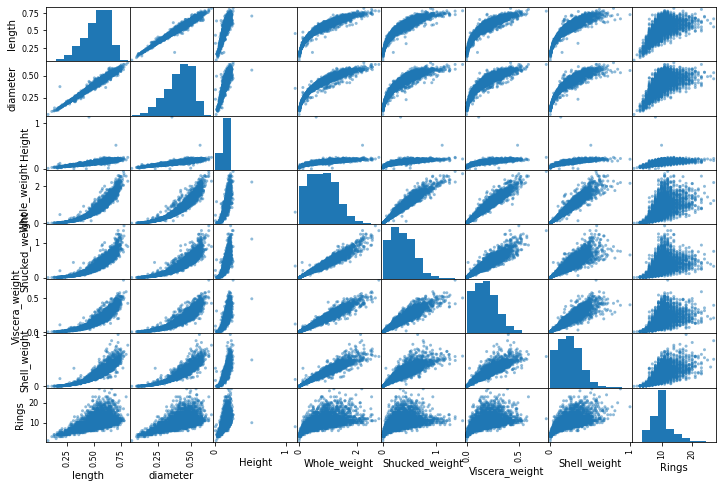

In [32]:
from pandas.plotting import scatter_matrix
attributes = ['sex', 'length', 'diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight', 'Rings']
scatter_matrix(ds_train[attributes], figsize=(12, 8))

In [33]:
y_train=ds_train["sex"]
ds_train=ds_train.drop("sex",axis=1)
y_test=ds_test["sex"]
ds_test=ds_test.drop("sex",axis=1)

In [34]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [35]:
sc = StandardScaler()
ds_train = sc.fit_transform(ds_train)
ds_test = sc.transform(ds_test)

In [36]:
logreg = LogisticRegression(random_state = 20, solver='sag', multi_class='multinomial')
logreg.fit(ds_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(multi_class='multinomial', random_state=20, solver='sag')

In [37]:
y_pred = logreg.predict(ds_test)
y_pred_prob=logreg.predict_proba(ds_test)

In [38]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 87  40 122]
 [ 18 236  37]
 [ 71  70 155]]


In [39]:
logreg.score(ds_test,y_test)

0.5717703349282297